<a href="https://colab.research.google.com/github/Slrosales/Air_quality_ML/blob/main/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación e instalación de librerías

In [ ]:
# Importamos la libreria como pd
import pandas as pd

# Importamos la libreria como sns
import seaborn as sns

# Importamos la libreria como plt
import matplotlib.pyplot as plt

# Importamos la libreria como np
import numpy as np

from scipy.stats import probplot

# Regresión Linear
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


sns.set(style="whitegrid")

In [ ]:
# Repositorio de Datasets
!pip install ucimlrepo

# Dataframe Air Quality

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

In [ ]:
# Metadata
air_quality.metadata

{'uci_id': 360,
 'name': 'Air Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv',
 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ',
 'area': 'Computer Science',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate', 'Time-Series'],
 'num_instances': 9358,
 'num_features': 15,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': None,
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Sun Mar 10 2024',
 'dataset_doi': '10.24432/C59K5F',
 'creators': ['Saverio Vito'],
 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario',
  'authors': 'S. D. 

In [ ]:
# variable information
air_quality.variables

,name,role,type,demographic,description,units,missing_values
0,Date,Feature,Date,None,None,None,no
1,Time,Feature,Categorical,None,None,None,no
2,CO(GT),Feature,Integer,None,True hourly averaged concentration CO in mg/m^...,mg/m^3,no
3,PT08.S1(CO),Feature,Categorical,None,hourly averaged sensor response (nominally CO...,None,no
4,NMHC(GT),Feature,Integer,None,True hourly averaged overall Non Metanic Hydro...,microg/m^3,no
5,C6H6(GT),Feature,Continuous,None,True hourly averaged Benzene concentration in...,microg/m^3,no
6,PT08.S2(NMHC),Feature,Categorical,None,hourly averaged sensor response (nominally NMH...,None,no
7,NOx(GT),Feature,Integer,None,True hourly averaged NOx concentration in ppb...,ppb,no
8,PT08.S3(NOx),Feature,Categorical,None,hourly averaged sensor response (nominally NOx...,None,no
9,NO2(GT),Feature,Integer,None,True hourly averaged NO2 concentration in micr...,microg/m^3,no


In [ ]:
# Dataframe
df = air_quality.data.features
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


Identificación de la cantidad de filas y columnas del df

In [ ]:
df.shape

(9357, 15)

Tengo 9357 filas y 15 columnas

# Limpieza del Dataset

Gracias a la documentación sabemos que existe el valor $-200$ como indicador de mediciones faltantes debido a que el sensor no registró esos datos. En el contexto de un estudio científico o de análisis de datos, es recomendable tratar estos valores faltantes de forma adecuada.

Procederemos a cambiar este valor NaN donde haya coincidencia y luego evaluar su impacto sobre la integridad de cada columna


In [ ]:
df_clean = df.replace(to_replace=-200, value=np.nan)

In [ ]:
nan_percent = (df_clean.isna().sum() / len(df)) * 100
nan_percent_df = pd.DataFrame(nan_percent, columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column', ascending=False)
nan_percent_df

,%_NaN_in_Column
NMHC(GT),90.231912
CO(GT),17.986534
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


NMHC(GT) es la concentración global real de Hidrocarburos no Metánicos en microg/m^3. En esta columna el 90% de los datos son NaN, por lo tanto conviene borrar la columna, ya que no aporta información relevante. Aun asi, podremos seguir evaluando al Benceno (C6H6), quien es un hidrocarburo no metalico y solo alrededor del 3.9% de los datos son NaN, es decir, no afectan demasiado el analisis de información.


In [ ]:
# Se elimina la columna NMHC(GT) y las filas con NaN de las demas columnas
df_clean.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


De 9357 filas, quedaron 6941, que hasta el momento podriamos decir que cuentan con datos consistentes

## Se evalua la correlación actual

In [ ]:
df_date = df_clean.copy()

<Axes: >

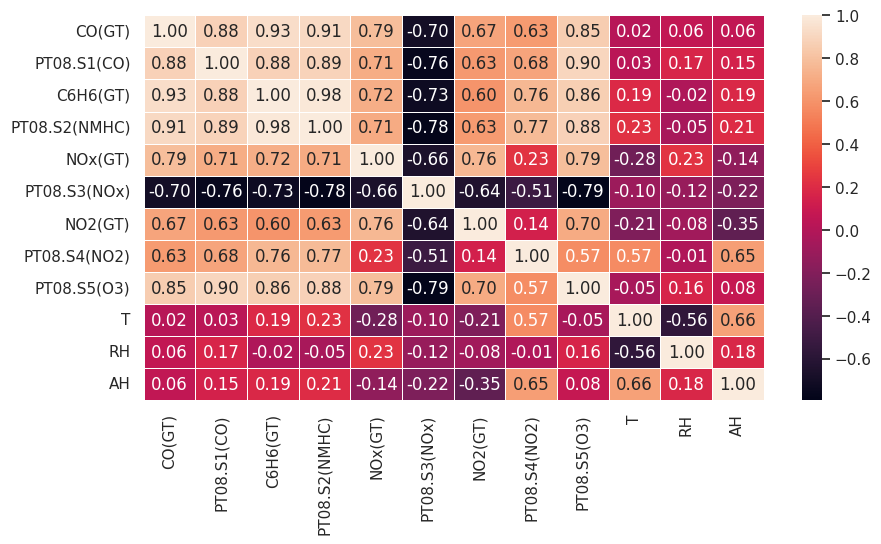

In [ ]:
df_clean.drop('Date', axis=1, inplace=True)
df_clean.drop('Time', axis=1, inplace=True)
Corrmat = df_clean.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

In [ ]:
df_clean.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,250.671949,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573
std,1.441158,218.733754,7.465226,264.055002,208.611371,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097
min,0.100000,647.000000,0.200000,390.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,956.000000,4.900000,760.000000,103.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100
50%,1.900000,1085.000000,8.800000,931.000000,186.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900
75%,2.900000,1254.000000,14.600000,1135.000000,335.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


# Reducción de sesgo, Normalización y Estandarización de Datos

In [ ]:
df_bxcx = df_clean.copy()

In [ ]:
from scipy import stats

# Columnas a las que se les aplicará Box-Cox
boxcox_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']

# Columnas a las que se les aplicará Yeo-Johnson
# la columna de temperatura que puede tener valores negativos
yeojohnson_columns = ['T']

# Aplicar Box-Cox a las columnas que tienen solo valores positivos
for column in boxcox_columns:

    df_bxcx[column], fitted_lambda = stats.boxcox(df_bxcx[column] + 1e-6)  # Se evita que el logaritmo de cero
    print(f"Lambda óptimo para {column} (Box-Cox): {fitted_lambda}")

# Aplicar Yeo-Johnson
for column in yeojohnson_columns:
    df_bxcx[column], fitted_lambda = stats.yeojohnson(df_bxcx[column])
    print(f"Lambda óptimo para {column} (Yeo-Johnson): {fitted_lambda}")


Lambda óptimo para CO(GT) (Box-Cox): 0.26983524764609984
Lambda óptimo para PT08.S1(CO) (Box-Cox): -0.5154771543458373
Lambda óptimo para C6H6(GT) (Box-Cox): 0.28815317517788963
Lambda óptimo para PT08.S2(NMHC) (Box-Cox): 0.217913102695212
Lambda óptimo para NOx(GT) (Box-Cox): 0.13935212955834572
Lambda óptimo para NO2(GT) (Box-Cox): 0.5294728387995483
Lambda óptimo para PT08.S4(NO2) (Box-Cox): 0.6723580796853647
Lambda óptimo para PT08.S5(O3) (Box-Cox): 0.3767816166434594
Lambda óptimo para RH (Box-Cox): 0.8646596320831097
Lambda óptimo para AH (Box-Cox): 0.5466311352149632
Lambda óptimo para T (Yeo-Johnson): 0.6118839406853481


In [ ]:
def clean_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

columns = ['NOx(GT)', 'NO2(GT)']

for column in columns:
    df_bxcx = clean_outliers(df_bxcx, column)


In [ ]:
df_z = df_bxcx.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Se estandariza las columnas numéricas
numeric_cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']  # Asegúrate de que solo son numéricas

# Inicializar el estandarizador
scaler = StandardScaler()

# Ajustar a los datos y transformar
df_z[numeric_cols] = scaler.fit_transform(df_z[numeric_cols])
df_z.head()


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.514760,1.120187,0.425015,0.429376,-0.152492,0.957603,0.084959,0.694934,0.608680,-0.386741,0.027109,-0.497868
1,0.108655,0.872041,0.093622,0.094423,-0.695120,1.429447,-0.388217,0.334484,-0.093576,-0.423381,-0.041192,-0.587878
2,0.252868,1.264260,0.034937,0.032972,-0.426226,1.293492,0.106410,0.323491,0.161822,-0.598478,0.314933,-0.518888
3,0.252868,1.175857,0.064506,0.067638,-0.110661,1.101555,0.274928,0.402984,0.464031,-0.714953,0.648890,-0.418796
4,-0.214824,0.795256,-0.381654,-0.383531,-0.426226,1.553407,0.149048,0.143528,0.248337,-0.688785,0.626772,-0.413102


<Axes: >

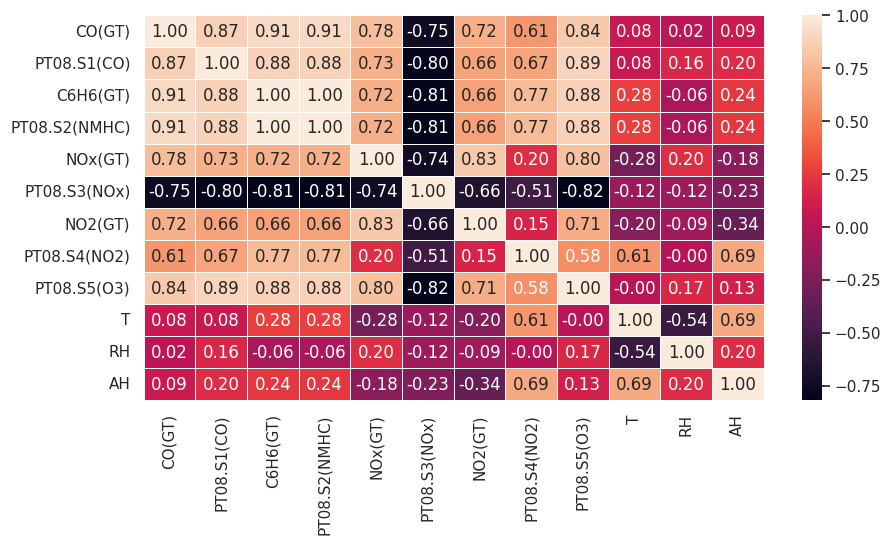

In [ ]:
Corrmat = df_z.corr()
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

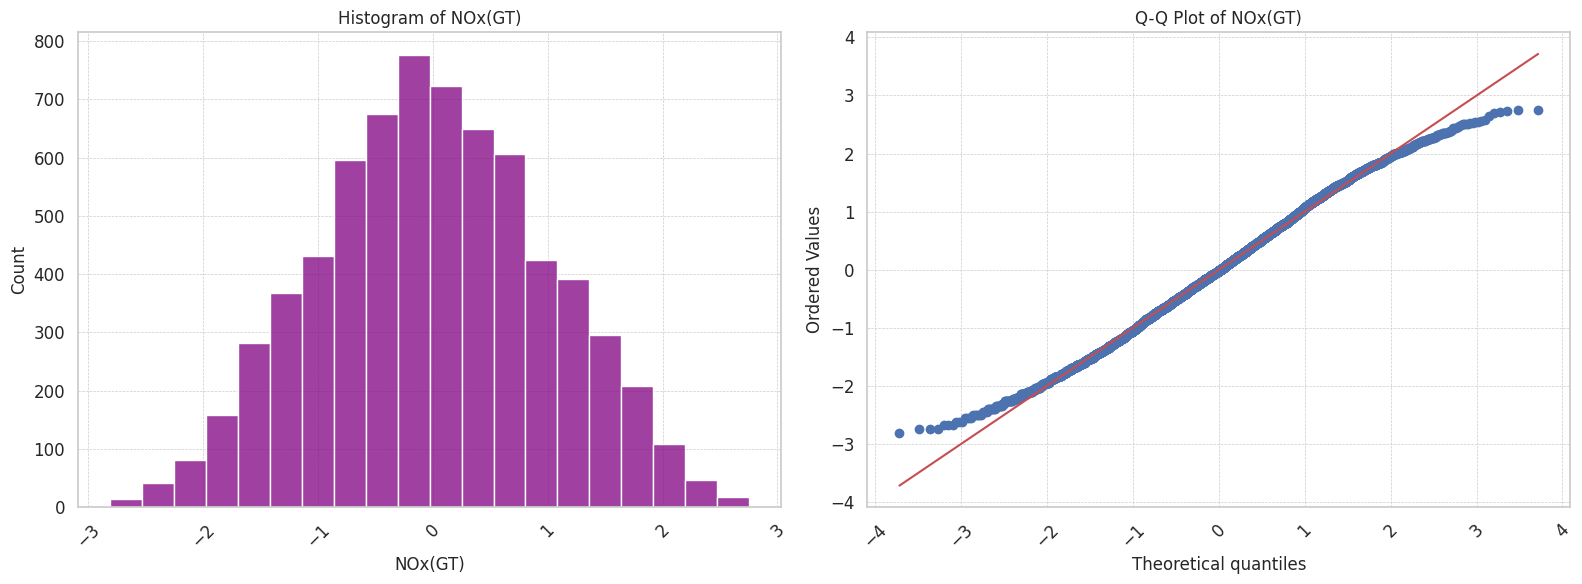

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Datos para los gráficos
data = df_z['NOx(GT)']

# Histograma
sns.histplot(data, ax=axs[0], color='purple', bins=20)
axs[0].set_title("Histogram of NOx(GT)")

# Q-Q plot
probplot(data, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of NOx(GT)")


for ax in axs:
    ax.tick_params(axis='x', labelsize=12, rotation=45)
    ax.tick_params(axis='y', labelsize=12)

for ax in axs:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Expansion de la columna Date

In [ ]:
df1 = df_z.copy()

In [ ]:
df_date['DateTime'] = pd.to_datetime(df_date['Date'] + ' ' + df_date['Time'], format='%m/%d/%Y %H:%M:%S')

# Extracción de datos
df_date['Weekday'] = df_date['DateTime'].dt.day_name()
df_date['Month']   = df_date['DateTime'].dt.month_name()
df_date['Hour']    = df_date['DateTime'].dt.hour

df_date.drop(['Date', 'Time'], axis=1, inplace=True)    # Ya no se necesitan

In [ ]:
df_date = df_date[['DateTime','Month', 'Weekday', 'Hour', 'CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
         'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
df_date.reset_index(drop=True, inplace=True)
df_date.head()

,DateTime,Month,Weekday,Hour,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,March,Wednesday,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,March,Wednesday,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,March,Wednesday,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,March,Wednesday,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,March,Wednesday,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# Observación y descripción de datos

Identificación de la estructura e integridad de los datos

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6892 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         6892 non-null   float64
 1   PT08.S1(CO)    6892 non-null   float64
 2   C6H6(GT)       6892 non-null   float64
 3   PT08.S2(NMHC)  6892 non-null   float64
 4   NOx(GT)        6892 non-null   float64
 5   PT08.S3(NOx)   6892 non-null   float64
 6   NO2(GT)        6892 non-null   float64
 7   PT08.S4(NO2)   6892 non-null   float64
 8   PT08.S5(O3)    6892 non-null   float64
 9   T              6892 non-null   float64
 10  RH             6892 non-null   float64
 11  AH             6892 non-null   float64
dtypes: float64(12)
memory usage: 700.0 KB


| Index | Variable     | Description                                                                 |
|-------|--------------|-----------------------------------------------------------------------------|
| 0     | DateTime     | Date and Time combined                                                      |
| 1     | Month        | Month extracted from DateTime                                               |
| 2     | Weekday      | Weekday extracted from DateTime                                             |
| 3     | Hour         | Hour extracted from DateTime                                                |
| 4     | CO(GT)       | True hourly averaged concentration CO in mg/m^3 (reference analyzer)        |
| 5     | PT08.S1(CO)  | PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) |
| 6     | C6H6(GT)     | True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)|
| 7     | PT08.S2(NMHC)| PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
| 8     | NOx(GT)      | True hourly averaged NOx concentration in ppb (reference analyzer)          |
| 9     | PT08.S3(NOx) | PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
| 10    | NO2(GT)      | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)   |
| 11    | PT08.S4(NO2) | PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
| 12    | PT08.S5(O3)  | PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
| 13    | T            | Temperature in °C                                                           |
| 14    | RH           | Relative Humidity (%)                                                       |
| 15    | AH           | Absolute Humidity                                                           |


In [ ]:
df_prob = df1.copy()

In [ ]:
df_prob = df_prob[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S1(CO)',
                   'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']]

In [ ]:
df_prob.describe()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03,6.892000e+03
mean,-4.948644e-17,-3.299096e-17,1.979457e-16,-1.979457e-16,-2.753095e-14,1.261904e-15,3.299096e-17,-2.639277e-16,-5.113598e-16,1.979457e-16,-6.598191e-17,-3.299096e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-2.960377e+00,-3.065181e+00,-2.808272e+00,-2.768138e+00,-3.201219e+00,-2.870100e+00,-1.977432e+00,-2.869967e+00,-2.944521e+00,-3.565913e+00,-2.428441e+00,-2.555065e+00
25%,-7.160419e-01,-7.130146e-01,-6.951200e-01,-6.816898e-01,-7.132169e-01,-7.128503e-01,-6.938542e-01,-6.694251e-01,-6.784674e-01,-6.887850e-01,-7.620230e-01,-6.748433e-01
50%,3.256456e-02,4.895453e-03,-1.773737e-02,2.006456e-02,-2.361214e-02,1.939271e-03,-1.220423e-01,5.398856e-02,-6.662676e-03,-1.300108e-03,3.847023e-02,2.117734e-02
75%,6.924450e-01,7.205794e-01,7.066246e-01,6.747871e-01,7.205970e-01,7.322633e-01,5.097499e-01,6.735218e-01,7.189694e-01,7.147421e-01,7.715622e-01,7.126737e-01
max,3.529989e+00,3.560562e+00,2.752896e+00,2.730163e+00,2.867017e+00,3.456888e+00,7.463463e+00,3.351036e+00,2.787686e+00,2.537386e+00,2.191266e+00,2.493790e+00


# **1er Modelo de Machine Learning:** Regresión Lineal

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def linear_regression_multiple(df, inputs, output, num_iterations=1000):
    scores_lr = []
    intercepts = []
    coefficients = []
    r2_scores_mean = []
    r2_scores_std = []
    mse_scores = []
    mae_scores = []

    for k in range(num_iterations):
        dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=k+1)
        lr = LinearRegression()
        lr.fit(dfTrain[inputs], dfTrain[output])
        y_pred = lr.predict(dfTest[inputs])
        score_lr = lr.score(dfTest[inputs], dfTest[output])

        scores_lr.append(score_lr)
        intercepts.append(lr.intercept_)
        coefficients.append(lr.coef_)

        # Calcular R^2 score
        X = df[inputs]
        y = df[output].values.ravel()
        kf = KFold(n_splits=10, shuffle=True, random_state=k+1)
        scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='r2')
        r2_scores_mean.append(np.mean(scores))
        r2_scores_std.append(np.std(scores))

        # Calcular MSE y MAE
        mse = mean_squared_error(dfTest[output], y_pred)
        mae = mean_absolute_error(dfTest[output], y_pred)
        mse_scores.append(mse)
        mae_scores.append(mae)

    # Imprimir los resultados
    print("Mean R^2 score:", np.mean(r2_scores_mean))
    print("Mean R^2 score standard deviation:", np.mean(r2_scores_std))
    print("Mean MSE:", np.mean(mse_scores))
    print("Mean MAE:", np.mean(mae_scores))
    print("Mean Intercept:", np.mean(intercepts))
    print("Mean Coefficients:", np.mean(coefficients, axis=0))

    return scores_lr

In [ ]:
def graphic_lr(df, inputs, output, text):
    scores_lr = linear_regression_multiple(df, inputs, output)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.kdeplot(scores_lr, fill=True)

    ax.set_title('Accuracy Distribution of the Linear Regression of '+ text , fontsize=16)
    ax.set_xlabel('Accuracy Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    plt.show()


##  **CO(GT)** Prediction

Mean R^2 score: 0.8634649808446122
Mean R^2 score standard deviation: 0.015346492775358845
Mean MSE: 0.1359572184610028
Mean MAE: 0.24160967375118908
Mean Intercept: -0.00014961931168077728
Mean Coefficients: [[ 1.00321101  0.01252893 -0.04648991 -0.11184711  0.03994581 -0.05043956]]


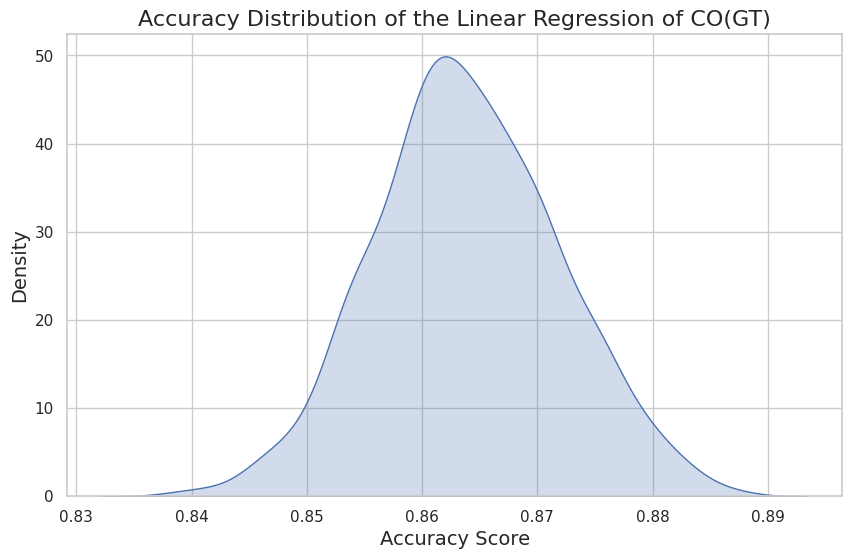

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']
inputs  = ['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'T', 'RH', 'AH']
output = ['CO(GT)']

graphic_lr(df1, inputs, output, 'CO(GT)')

##  **C6H6(GT)** Prediction

Mean R^2 score: 0.9366320020511617
Mean R^2 score standard deviation: 0.00616458485682924
Mean MSE: 0.06307523796291666
Mean MAE: 0.1895239342127429
Mean Intercept: 7.453095750794232e-06
Mean Coefficients: [[-0.30274961  0.58287779  0.33748609  0.14781215 -0.37401651]]


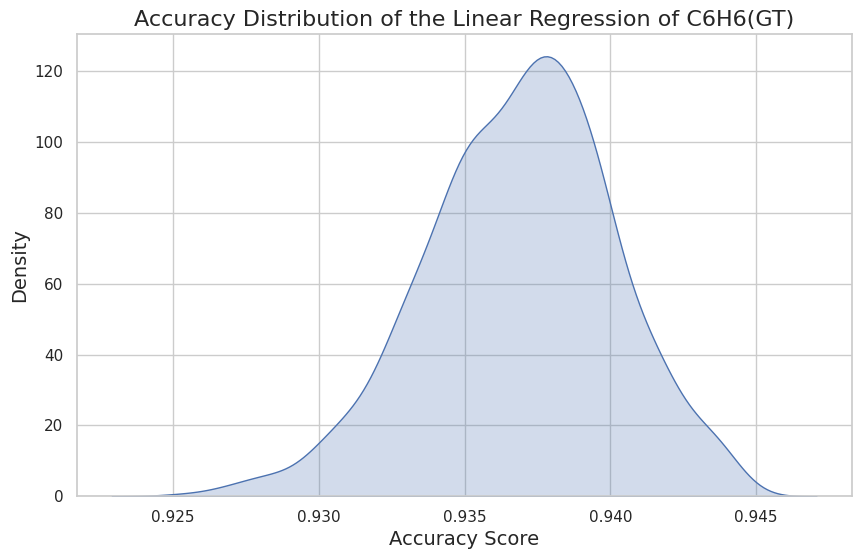

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs  = ['PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'AH']
output = ['C6H6(GT)']

graphic_lr(df1, inputs, output, 'C6H6(GT)')

## **NOx(GT)** Prediction

Mean R^2 score: 0.7789213296493167
Mean R^2 score standard deviation: 0.013075522488682515
Mean MSE: 0.22026372058627924
Mean MAE: 0.38552931659695566
Mean Intercept: -4.3918365301722725e-05
Mean Coefficients: [[-0.05974414  0.63192191  0.30016913 -0.13674191  0.18629711 -0.30245985]]


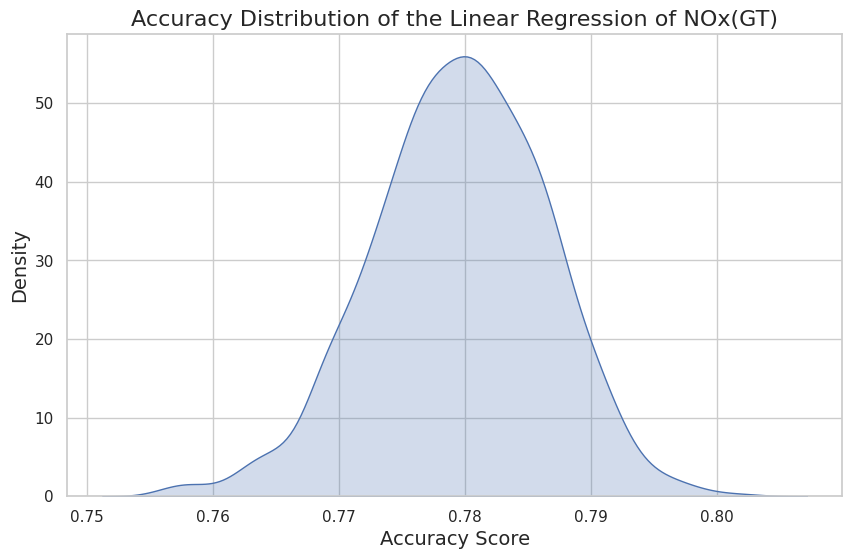

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
output = ['NOx(GT)']

graphic_lr(df1, inputs, output, 'NOx(GT)')

# **2do Modelo de Machine Learning:** Redes Neuronales

In [ ]:
def neural_network_regression(df, inputs, output, num_iterations=10):
    scores_nn = []
    r2_scores_mean = []
    r2_scores_std = []
    mse_scores = []
    mae_scores = []

    for k in range(num_iterations):
        dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=k+1)
        mlp_nn = MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', alpha=0.05)
        mlp_nn.fit(dfTrain[inputs], dfTrain[output].values.ravel())  # Corrección aquí
        y_pred = mlp_nn.predict(dfTest[inputs])

        # Calcular métricas de evaluación
        score_nn = mlp_nn.score(dfTest[inputs], dfTest[output])
        mse = mean_squared_error(dfTest[output], y_pred)
        mae = mean_absolute_error(dfTest[output], y_pred)

        scores_nn.append(score_nn)
        mse_scores.append(mse)
        mae_scores.append(mae)

        # Calcular R^2 score
        X = df[inputs]
        y = df[output].values.ravel()  # Corrección aquí
        kf = KFold(n_splits=10, shuffle=True, random_state=k+1)
        scores = cross_val_score(mlp_nn, X, y, cv=kf, scoring='r2')
        r2_scores_mean.append(np.mean(scores))
        r2_scores_std.append(np.std(scores))

    # Imprimir los resultados
    print("Mean R^2 score:", np.mean(r2_scores_mean))
    print("Mean R^2 score standard deviation:", np.mean(r2_scores_std))
    print("Mean MSE:", np.mean(mse_scores))
    print("Mean MAE:", np.mean(mae_scores))
    print("Mean R^2 score:", np.mean(scores_nn))

    return scores_nn


In [ ]:
def graphic_nn(df, inputs, output, text):
    scores_nn = neural_network_regression(df, inputs, output)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.kdeplot(scores_nn, fill=True)

    ax.set_title("Accuracy Distribution of the " + text + " Neural Network" , fontsize=16)
    ax.set_xlabel('Accuracy Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    plt.show()


##  **CO(GT)** Prediction

Mean R^2 score: 0.8733752535963835
Mean R^2 score standard deviation: 0.01304270344775339
Mean MSE: 0.12515909366458394
Mean MAE: 0.23193231850634038
Mean R^2 score: 0.8750785620823562


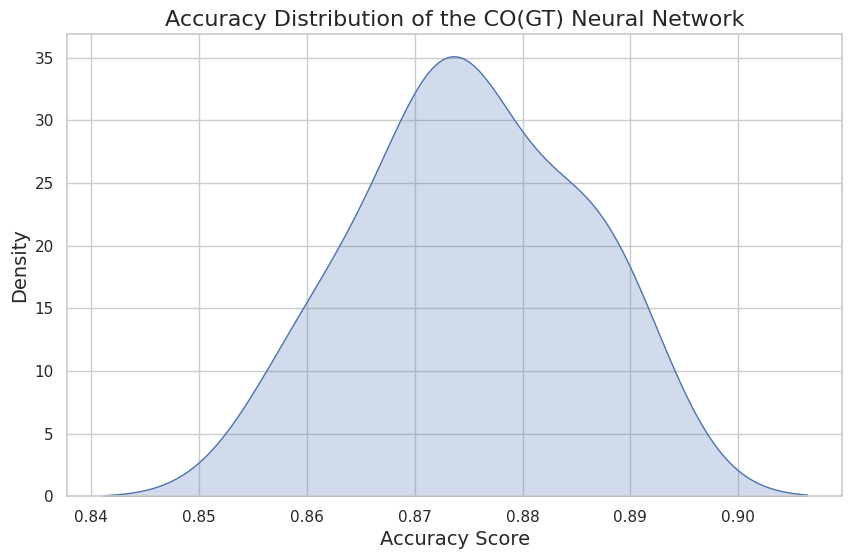

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']
inputs  = ['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'T', 'RH', 'AH']
output = ['CO(GT)']

graphic_nn(df1, inputs, output, 'CO(GT)')

##  **C6H6(GT)** Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean R^2 score: 0.9650142436784719
Mean R^2 score standard deviation: 0.005179877057939515
Mean MSE: 0.030675667346013995
Mean MAE: 0.1327642188235092
Mean R^2 score: 0.9689354027057077


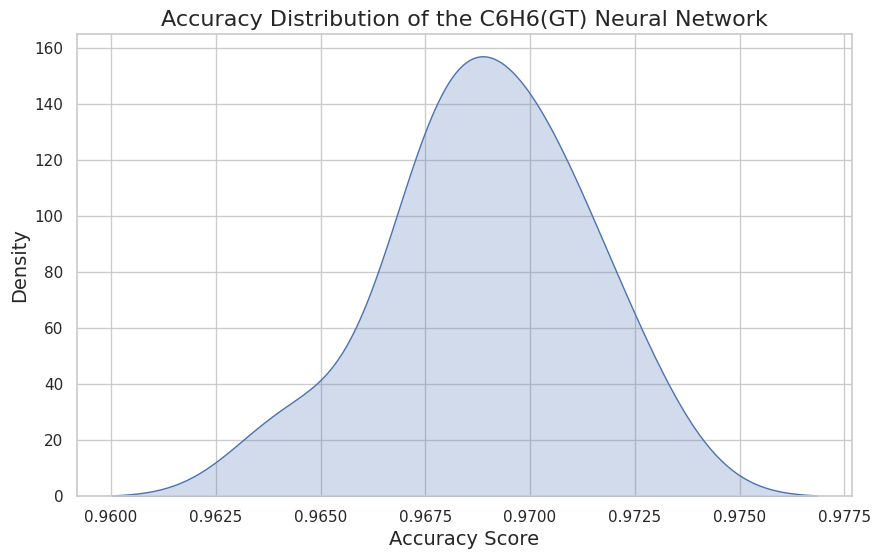

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs  = ['PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'AH']
output = ['C6H6(GT)']

graphic_nn(df1, inputs, output, 'C6H6(GT)')

## **NOx(GT)** Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean R^2 score: 0.8401513406062391
Mean R^2 score standard deviation: 0.010533833135293692
Mean MSE: 0.15519694859458988
Mean MAE: 0.3103096067542675
Mean R^2 score: 0.8449996050153127


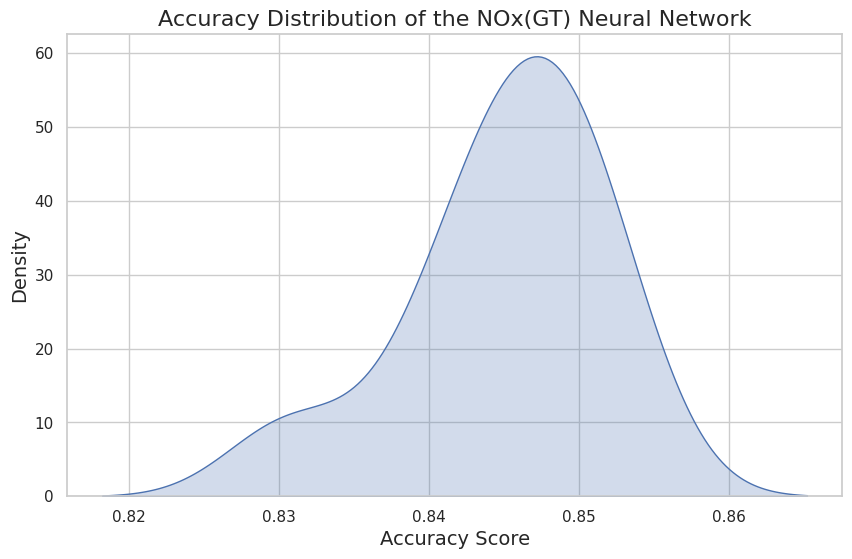

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
output = ['NOx(GT)']

graphic_nn(df1, inputs, output, 'NOx(GT)')

# **3er Modelo de Machine Learning:** Redes Neuronales

In [ ]:
def neural_network_regression2(df, inputs, output, num_iterations=5):
    scores_nn = []
    r2_scores_mean = []
    r2_scores_std = []
    mse_scores = []
    mae_scores = []

    for k in range(num_iterations):
        dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=k+1)
        mlp_nn = MLPRegressor(hidden_layer_sizes=(5, 10), activation='relu', alpha=0.05)
        mlp_nn.fit(dfTrain[inputs], dfTrain[output].values.ravel())  # Corrección aquí
        y_pred = mlp_nn.predict(dfTest[inputs])

        # Calcular métricas de evaluación
        score_nn = mlp_nn.score(dfTest[inputs], dfTest[output])
        mse = mean_squared_error(dfTest[output], y_pred)
        mae = mean_absolute_error(dfTest[output], y_pred)

        scores_nn.append(score_nn)
        mse_scores.append(mse)
        mae_scores.append(mae)

        # Calcular R^2 score
        X = df[inputs]
        y = df[output].values.ravel()  # Corrección aquí
        kf = KFold(n_splits=10, shuffle=True, random_state=k+1)
        scores = cross_val_score(mlp_nn, X, y, cv=kf, scoring='r2')
        r2_scores_mean.append(np.mean(scores))
        r2_scores_std.append(np.std(scores))

    # Imprimir los resultados
    print("Mean R^2 score:", np.mean(r2_scores_mean))
    print("Mean R^2 score standard deviation:", np.mean(r2_scores_std))
    print("Mean MSE:", np.mean(mse_scores))
    print("Mean MAE:", np.mean(mae_scores))
    print("Mean R^2 score:", np.mean(scores_nn))

    return scores_nn


In [ ]:
def graphic_nn2(df, inputs, output, text):
    scores_nn = neural_network_regression2(df, inputs, output)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.kdeplot(scores_nn, fill=True)

    ax.set_title("Accuracy Distribution of the " + text + " Neural Network" , fontsize=16)
    ax.set_xlabel('Accuracy Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    plt.show()


##  **CO(GT)** Prediction

Mean R^2 score: 0.8693799911715502
Mean R^2 score standard deviation: 0.013646588842908721
Mean MSE: 0.1299069614213621
Mean MAE: 0.2360934836425485
Mean R^2 score: 0.8711508679123152


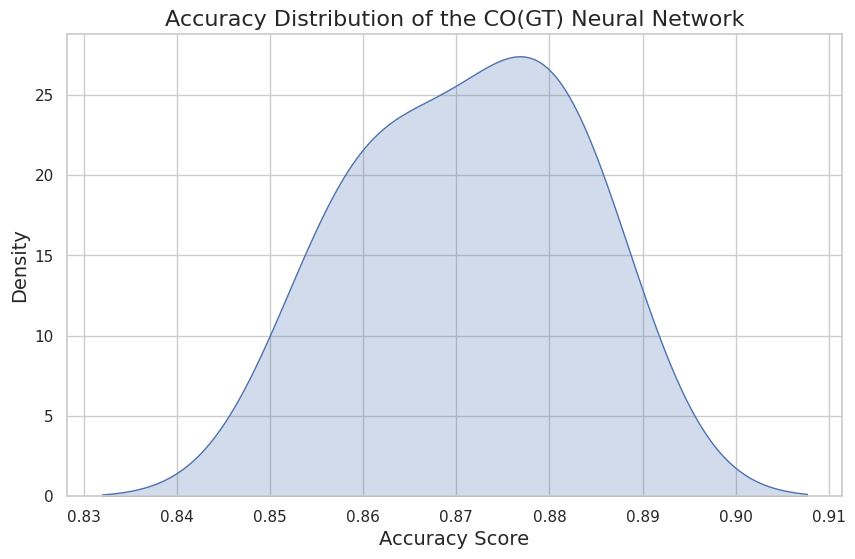

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']
inputs  = ['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'T', 'RH', 'AH']
output = ['CO(GT)']

graphic_nn2(df1, inputs, output, 'CO(GT)')

##  **C6H6(GT)** Prediction

Mean R^2 score: 0.9549088927019632
Mean R^2 score standard deviation: 0.005236527201627026
Mean MSE: 0.044357300502714726
Mean MAE: 0.16211966752518467
Mean R^2 score: 0.9556238893822055


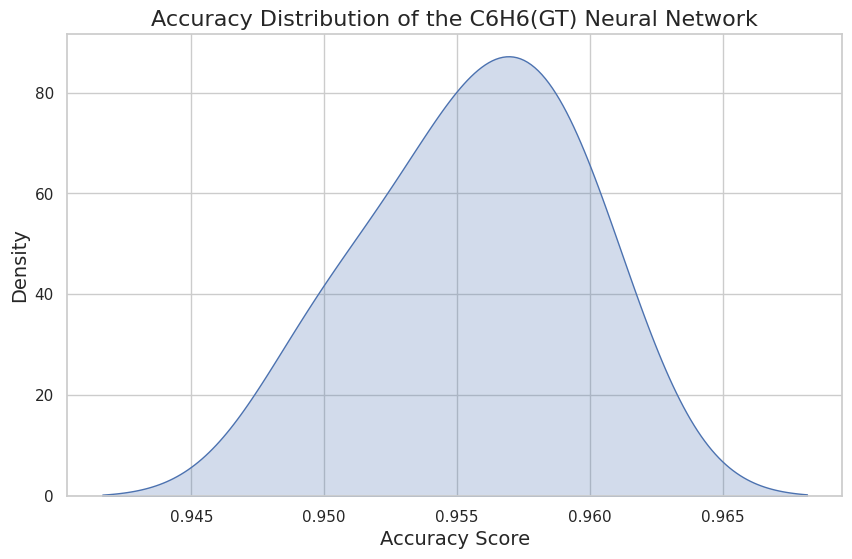

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs  = ['PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'AH']
output = ['C6H6(GT)']

graphic_nn2(df1, inputs, output, 'C6H6(GT)')

## **NOx(GT)** Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean R^2 score: 0.8245815608311716
Mean R^2 score standard deviation: 0.01470981749552831
Mean MSE: 0.17571794211057146
Mean MAE: 0.33678226562888147
Mean R^2 score: 0.8264337287898386


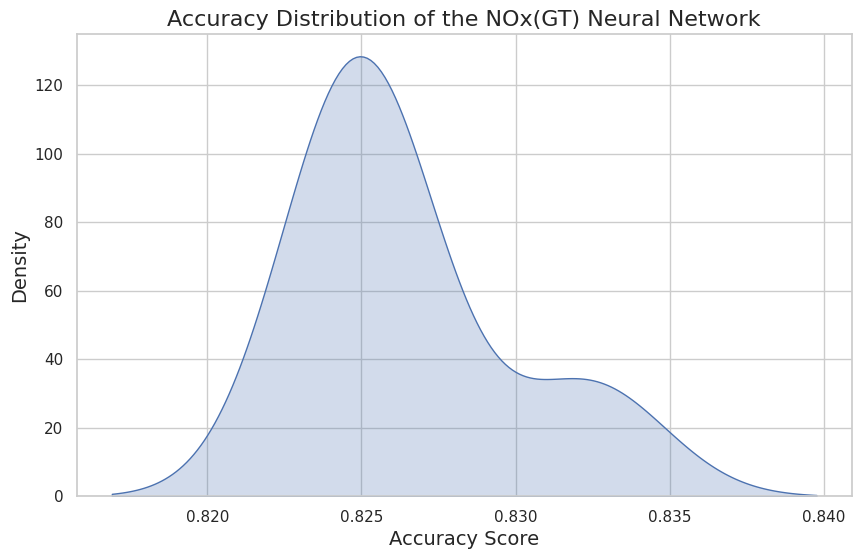

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
output = ['NOx(GT)']

graphic_nn2(df1, inputs, output, 'NOx(GT)')

# **4to Modelo de Machine Learning:** Redes Neuronales

In [ ]:
def neural_network_regression3(df, inputs, output, num_iterations=5):
    scores_nn = []
    r2_scores_mean = []
    r2_scores_std = []
    mse_scores = []
    mae_scores = []

    for k in range(num_iterations):
        dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=k+1)
        mlp_nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', alpha=0.05)
        mlp_nn.fit(dfTrain[inputs], dfTrain[output].values.ravel())  # Corrección aquí
        y_pred = mlp_nn.predict(dfTest[inputs])

        # Calcular métricas de evaluación
        score_nn = mlp_nn.score(dfTest[inputs], dfTest[output])
        mse = mean_squared_error(dfTest[output], y_pred)
        mae = mean_absolute_error(dfTest[output], y_pred)

        scores_nn.append(score_nn)
        mse_scores.append(mse)
        mae_scores.append(mae)

        # Calcular R^2 score
        X = df[inputs]
        y = df[output].values.ravel()  # Corrección aquí
        kf = KFold(n_splits=10, shuffle=True, random_state=k+1)
        scores = cross_val_score(mlp_nn, X, y, cv=kf, scoring='r2')
        r2_scores_mean.append(np.mean(scores))
        r2_scores_std.append(np.std(scores))

    # Imprimir los resultados
    print("Mean R^2 score:", np.mean(r2_scores_mean))
    print("Mean R^2 score standard deviation:", np.mean(r2_scores_std))
    print("Mean MSE:", np.mean(mse_scores))
    print("Mean MAE:", np.mean(mae_scores))
    print("Mean R^2 score:", np.mean(scores_nn))

    return scores_nn


In [ ]:
def graphic_nn3(df, inputs, output, text):
    scores_nn = neural_network_regression3(df, inputs, output)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.kdeplot(scores_nn, fill=True)

    ax.set_title("Accuracy Distribution of the " + text + " Neural Network" , fontsize=16)
    ax.set_xlabel('Accuracy Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    plt.show()


##  **CO(GT)** Prediction

Mean R^2 score: 0.8631075796963307
Mean R^2 score standard deviation: 0.014158487873750686
Mean MSE: 0.13631009458745988
Mean MAE: 0.24340282720977063
Mean R^2 score: 0.8648080879974126


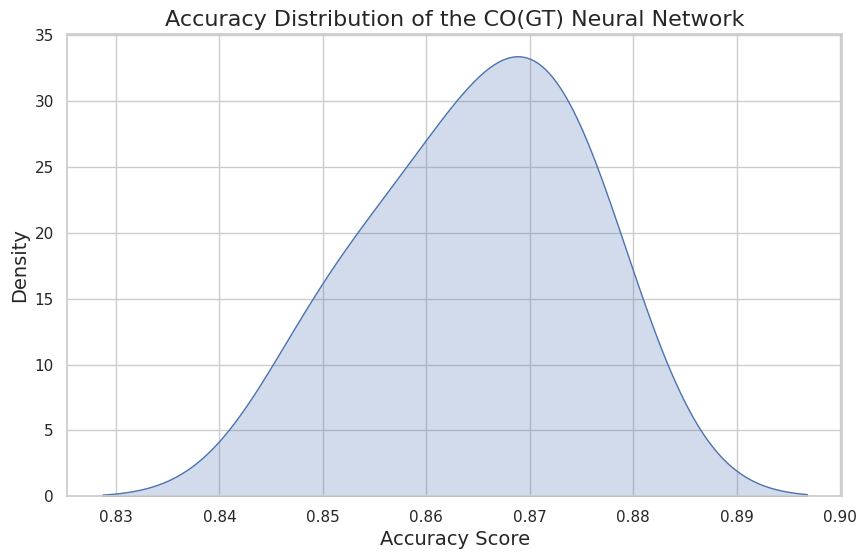

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']
inputs  = ['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'T', 'RH', 'AH']
output = ['CO(GT)']

graphic_nn3(df1, inputs, output, 'CO(GT)')

##  **C6H6(GT)** Prediction

Mean R^2 score: 0.9364593420513654
Mean R^2 score standard deviation: 0.006116311174825103
Mean MSE: 0.06163345810529538
Mean MAE: 0.18722291326431076
Mean R^2 score: 0.9383809630411342


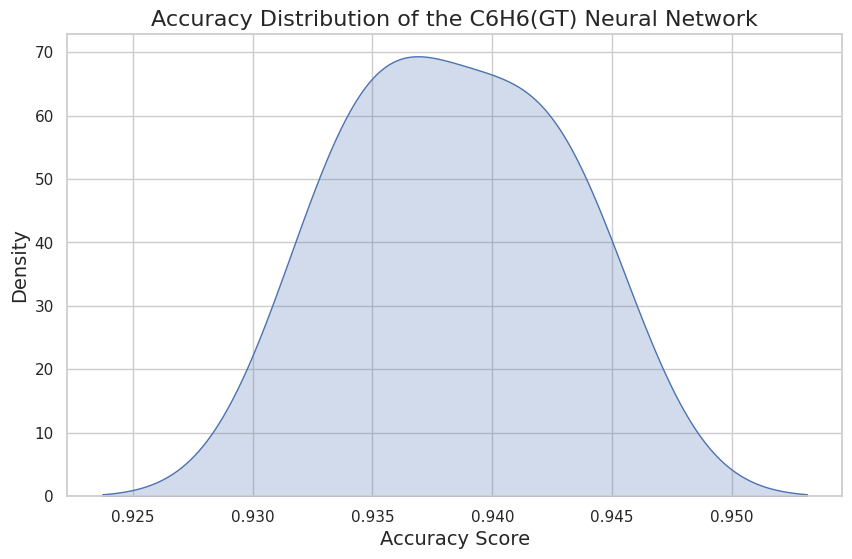

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs  = ['PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'AH']
output = ['C6H6(GT)']

graphic_nn3(df1, inputs, output, 'C6H6(GT)')

## **NOx(GT)** Prediction

Mean R^2 score: 0.7783209965740051
Mean R^2 score standard deviation: 0.01575937996636261
Mean MSE: 0.2189924067075668
Mean MAE: 0.3850760367487778
Mean R^2 score: 0.7835737433814736


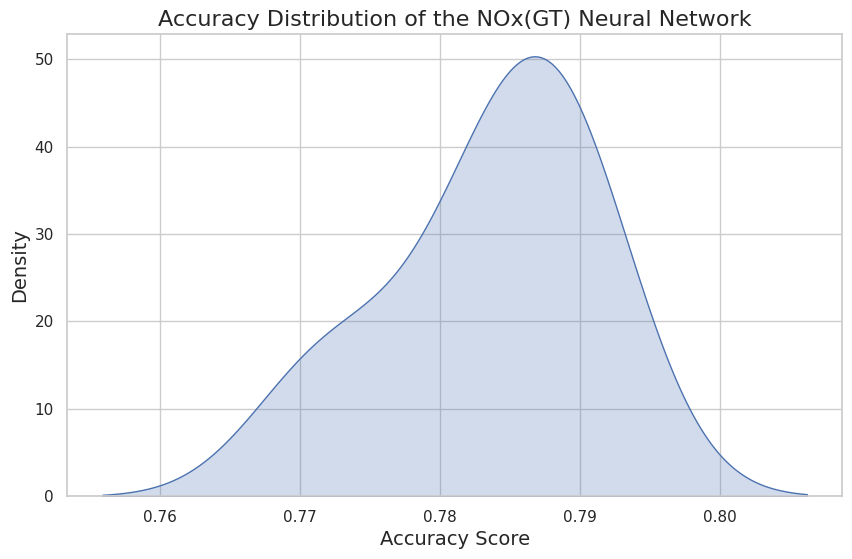

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
output = ['NOx(GT)']

graphic_nn3(df1, inputs, output, 'NOx(GT)')

# **5to Modelo de Machine Learning:** Redes Neuronales

In [ ]:
def neural_network_regression4(df, inputs, output, num_iterations=5):
    scores_nn = []
    r2_scores_mean = []
    r2_scores_std = []
    mse_scores = []
    mae_scores = []

    for k in range(num_iterations):
        dfTrain, dfTest = train_test_split(df, test_size=0.3, random_state=k+1)
        mlp_nn = MLPRegressor(hidden_layer_sizes=(15, 15), activation='relu', alpha=0.05)
        mlp_nn.fit(dfTrain[inputs], dfTrain[output].values.ravel())  # Corrección aquí
        y_pred = mlp_nn.predict(dfTest[inputs])

        # Calcular métricas de evaluación
        score_nn = mlp_nn.score(dfTest[inputs], dfTest[output])
        mse = mean_squared_error(dfTest[output], y_pred)
        mae = mean_absolute_error(dfTest[output], y_pred)

        scores_nn.append(score_nn)
        mse_scores.append(mse)
        mae_scores.append(mae)

        # Calcular R^2 score
        X = df[inputs]
        y = df[output].values.ravel()  # Corrección aquí
        kf = KFold(n_splits=10, shuffle=True, random_state=k+1)
        scores = cross_val_score(mlp_nn, X, y, cv=kf, scoring='r2')
        r2_scores_mean.append(np.mean(scores))
        r2_scores_std.append(np.std(scores))

    # Imprimir los resultados
    print("Mean R^2 score:", np.mean(r2_scores_mean))
    print("Mean R^2 score standard deviation:", np.mean(r2_scores_std))
    print("Mean MSE:", np.mean(mse_scores))
    print("Mean MAE:", np.mean(mae_scores))
    print("Mean R^2 score:", np.mean(scores_nn))

    return scores_nn


In [ ]:
def graphic_nn4(df, inputs, output, text):
    scores_nn = neural_network_regression4(df, inputs, output)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    ax = sns.kdeplot(scores_nn, fill=True)

    ax.set_title("Accuracy Distribution of the " + text + " Neural Network", fontsize=16)
    ax.set_xlabel('Accuracy Score', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)

    plt.show()


##  **CO(GT)** Prediction

Mean R^2 score: 0.8753842144696883
Mean R^2 score standard deviation: 0.012845391116044727
Mean MSE: 0.12320554815773073
Mean MAE: 0.22795535699281294
Mean R^2 score: 0.8777687841942756


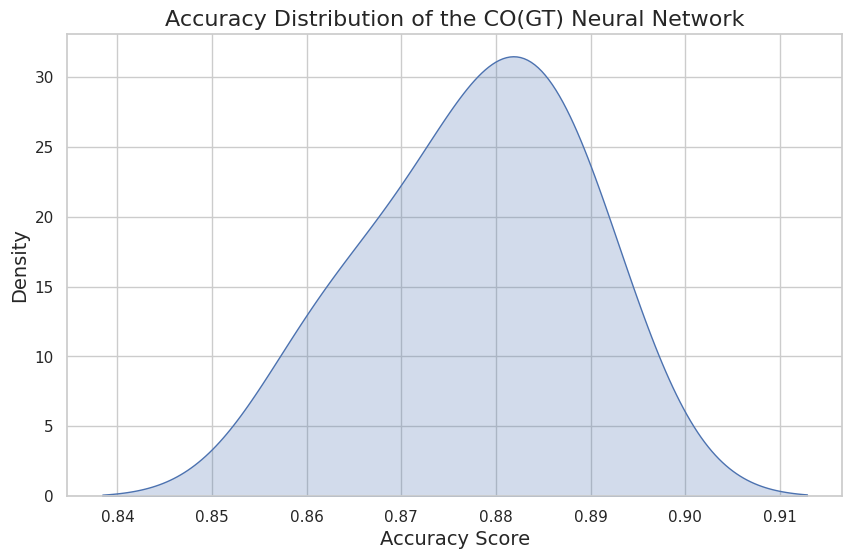

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']
inputs  = ['PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'T', 'RH', 'AH']
output = ['CO(GT)']

graphic_nn4(df1, inputs, output, 'CO(GT)')

##  **C6H6(GT)** Prediction

Mean R^2 score: 0.9677912975348262
Mean R^2 score standard deviation: 0.004375615485150634
Mean MSE: 0.033254045040218796
Mean MAE: 0.13828016566223247
Mean R^2 score: 0.9667160682437869


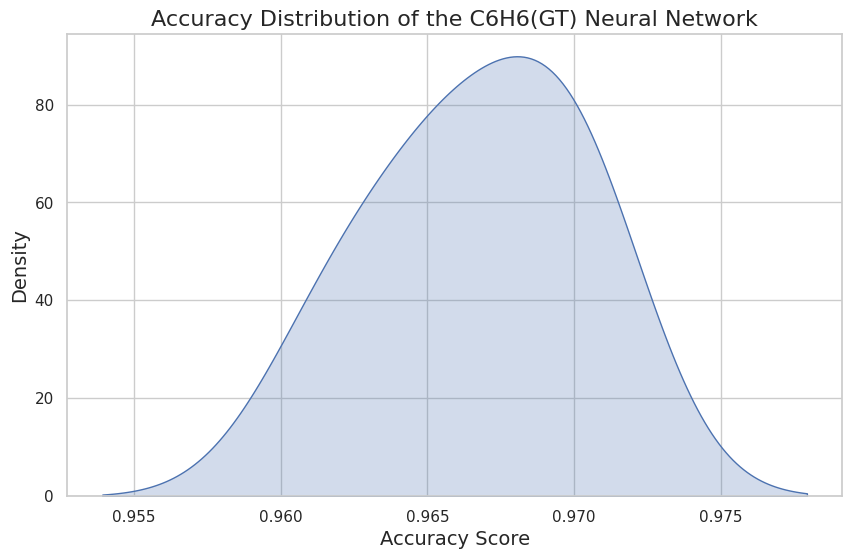

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs  = ['PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'AH']
output = ['C6H6(GT)']

graphic_nn4(df1, inputs, output, 'C6H6(GT)')

## **NOx(GT)** Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean R^2 score: 0.8444603505640327
Mean R^2 score standard deviation: 0.011728720268626447
Mean MSE: 0.15206058211715015
Mean MAE: 0.30524932044105224
Mean R^2 score: 0.8497182176085778


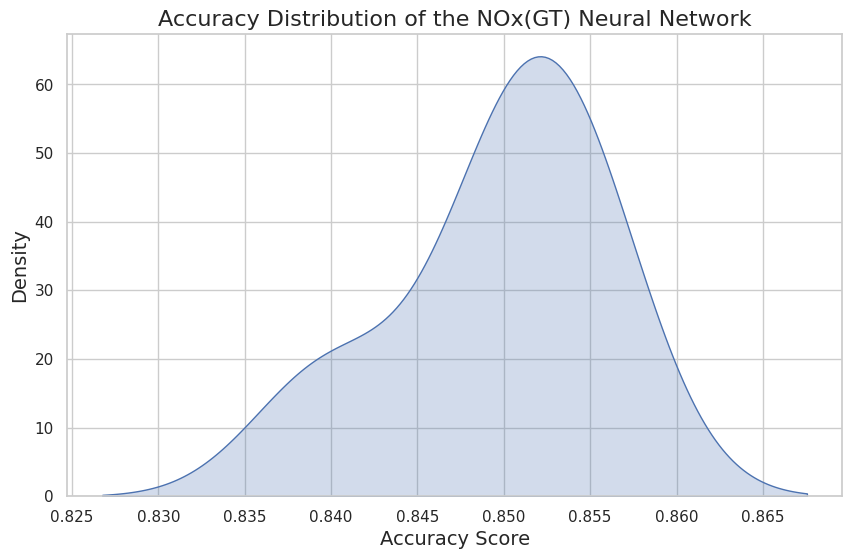

In [ ]:
# ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
# ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)']
# ['T', 'RH', 'AH']

inputs = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
output = ['NOx(GT)']

graphic_nn4(df1, inputs, output, 'NOx(GT)')